## Part B (I)

In [522]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [523]:
adm = pd.read_csv('admission.csv')
adm.head(5)
corr_matrix = adm.corr()
corr_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


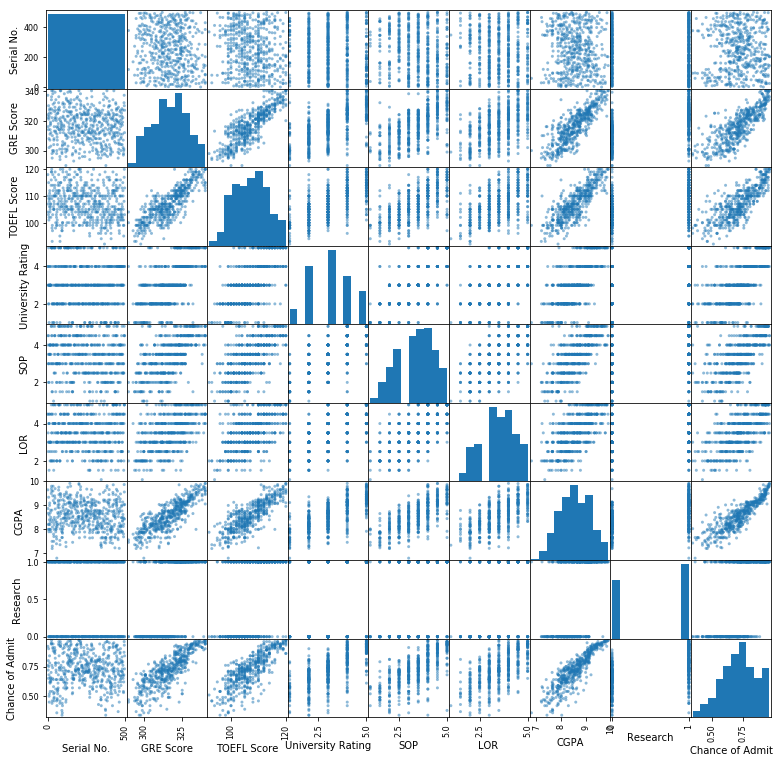

In [524]:
pd.plotting.scatter_matrix(adm, figsize=(13, 13))
plt.show()

In [525]:
adm = adm.drop(adm.columns[[0,3,4,5,7]], axis=1)

In [526]:
adm.head(3)

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72


In [527]:
print('Maximum GRE: ', adm['GRE Score'].max())
print('Maximum TOERL: ', adm['TOEFL Score'].max())
print('Maximun CGPA: ', adm['CGPA'].max())

Maximum GRE:  340
Maximum TOERL:  120
Maximun CGPA:  9.92


In [528]:
adm['GRE Score'] = adm['GRE Score']/340
adm['TOEFL Score'] = adm['TOEFL Score']/120
adm['CGPA'] = adm['CGPA']/10

In [529]:
adm.head(2)

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,0.991176,0.983333,0.965,0.92
1,0.952941,0.891667,0.887,0.76


In [530]:
#for single regression
x_train, x_test, y_train, y_test = train_test_split(adm[['CGPA']], adm['Chance of Admit'], test_size=0.2, random_state=42)

In [531]:
#import tensorflow keras library
from keras import Sequential
from keras.layers.core import Dense

In [532]:
model_relu = Sequential()
model_relu.add(Dense(60, input_dim=x_train.shape[1], activation='relu')) 
model_relu.add(Dense(30, activation='relu')) # Hidden 2
model_relu.add(Dense(1)) # Output
model_relu.compile(loss='mean_squared_error', optimizer='adam')
model_relu.fit(x_train,y_train,verbose=1,epochs=6) 

Epoch 1/7
400/400 [==============================] - 0s 280us/step - loss: 0.0998
Epoch 2/7
400/400 [==============================] - 0s 55us/step - loss: 0.0164
Epoch 3/7
400/400 [==============================] - 0s 60us/step - loss: 0.0132
Epoch 4/7
400/400 [==============================] - 0s 50us/step - loss: 0.0115
Epoch 5/7
400/400 [==============================] - 0s 55us/step - loss: 0.0115
Epoch 6/7
400/400 [==============================] - 0s 57us/step - loss: 0.0110
Epoch 7/7
400/400 [==============================] - 0s 50us/step - loss: 0.0110


Shape: (100, 1)
Final score (RMSE): 0.10605402764945732
R2 score: 0.45


Text(0, 0.5, 'Predicted values for y')

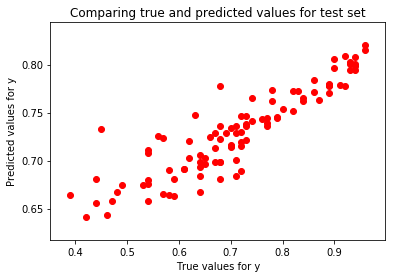

In [533]:
y_pred_nn = model_relu.predict(x_test)
print("Shape: {}".format(y_pred_nn.shape))
score_nn = np.sqrt(mean_squared_error(y_test,y_pred_nn))
print("Final score (RMSE): {}".format(score_nn))
print('R2 score: %.2f' % r2_score(y_test, y_pred_nn))
plt.scatter(y_test, y_pred_nn, color='red')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

### MLR

In [534]:
x1 = adm.drop('Chance of Admit', axis=1)
y1 = adm[['Chance of Admit']]
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2,
                                                  random_state=1)

In [535]:
model_relu = Sequential()
model_relu.add(Dense(60, input_dim=x_train1.shape[1], activation='relu')) 
model_relu.add(Dense(30, activation='relu')) # Hidden 2
model_relu.add(Dense(1)) # Output
model_relu.compile(loss='mean_squared_error', optimizer='adam')
model_relu.fit(x_train1,y_train1,verbose=1,epochs=7) 

Epoch 1/7
400/400 [==============================] - 0s 345us/step - loss: 0.4041
Epoch 2/7
400/400 [==============================] - 0s 65us/step - loss: 0.1472
Epoch 3/7
400/400 [==============================] - 0s 62us/step - loss: 0.0250
Epoch 4/7
400/400 [==============================] - 0s 70us/step - loss: 0.0168
Epoch 5/7
400/400 [==============================] - 0s 57us/step - loss: 0.0134
Epoch 6/7
400/400 [==============================] - 0s 60us/step - loss: 0.0131
Epoch 7/7
400/400 [==============================] - 0s 57us/step - loss: 0.0128


Shape: (100, 1)
Final score (RMSE): 0.11288318787675151
R2 score: 0.34


Text(0, 0.5, 'Predicted values for y')

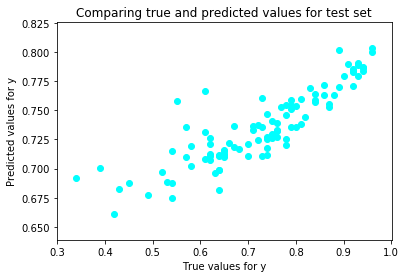

In [536]:
y_pred_nn1 = model_relu.predict(x_test1)
print("Shape: {}".format(y_pred_nn1.shape))
score_nn1 = np.sqrt(mean_squared_error(y_test1,y_pred_nn1))
print("Final score (RMSE): {}".format(score_nn1))
print('R2 score: %.2f' % r2_score(y_test1, y_pred_nn1))
plt.scatter(y_test1, y_pred_nn1, color='cyan')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

## End of Part B (I)

# Part B (II)
## Classification using decision trees

In [537]:
admis = pd.read_csv('admission.csv')
admis

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [538]:
admis['Chance of Admit'].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

In [539]:
class1 = admis[(admis['Chance of Admit']<0.63)].count()
class2 = admis[(admis['Chance of Admit']>0.63) & (admis['Chance of Admit']<0.82)].count()
class3 = admis[(admis['Chance of Admit']>0.82)].count()
print("Class 1: ", class1, "Class 2: ", class2, "Class 3: ", class3)

Class 1:  Serial No.           120
GRE Score            120
TOEFL Score          120
University Rating    120
SOP                  120
LOR                  120
CGPA                 120
Research             120
Chance of Admit      120
dtype: int64 Class 2:  Serial No.           240
GRE Score            240
TOEFL Score          240
University Rating    240
SOP                  240
LOR                  240
CGPA                 240
Research             240
Chance of Admit      240
dtype: int64 Class 3:  Serial No.           124
GRE Score            124
TOEFL Score          124
University Rating    124
SOP                  124
LOR                  124
CGPA                 124
Research             124
Chance of Admit      124
dtype: int64


In [540]:
admis['new_col'] = np.where(admis['Chance of Admit']<0.63, 1, np.where(admis['Chance of Admit']>0.82, 3, 2))

In [541]:
admis['new_col'] = admis['new_col'].sort_values()

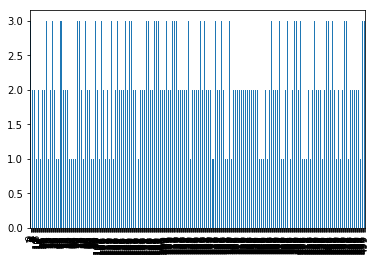

In [542]:
admis['new_col'].plot.bar()

In [543]:
feature_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'Research']
X = admis[feature_cols] # Features
y = admis['new_col'] # Target variable

In [544]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [545]:
#imports
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [546]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.74


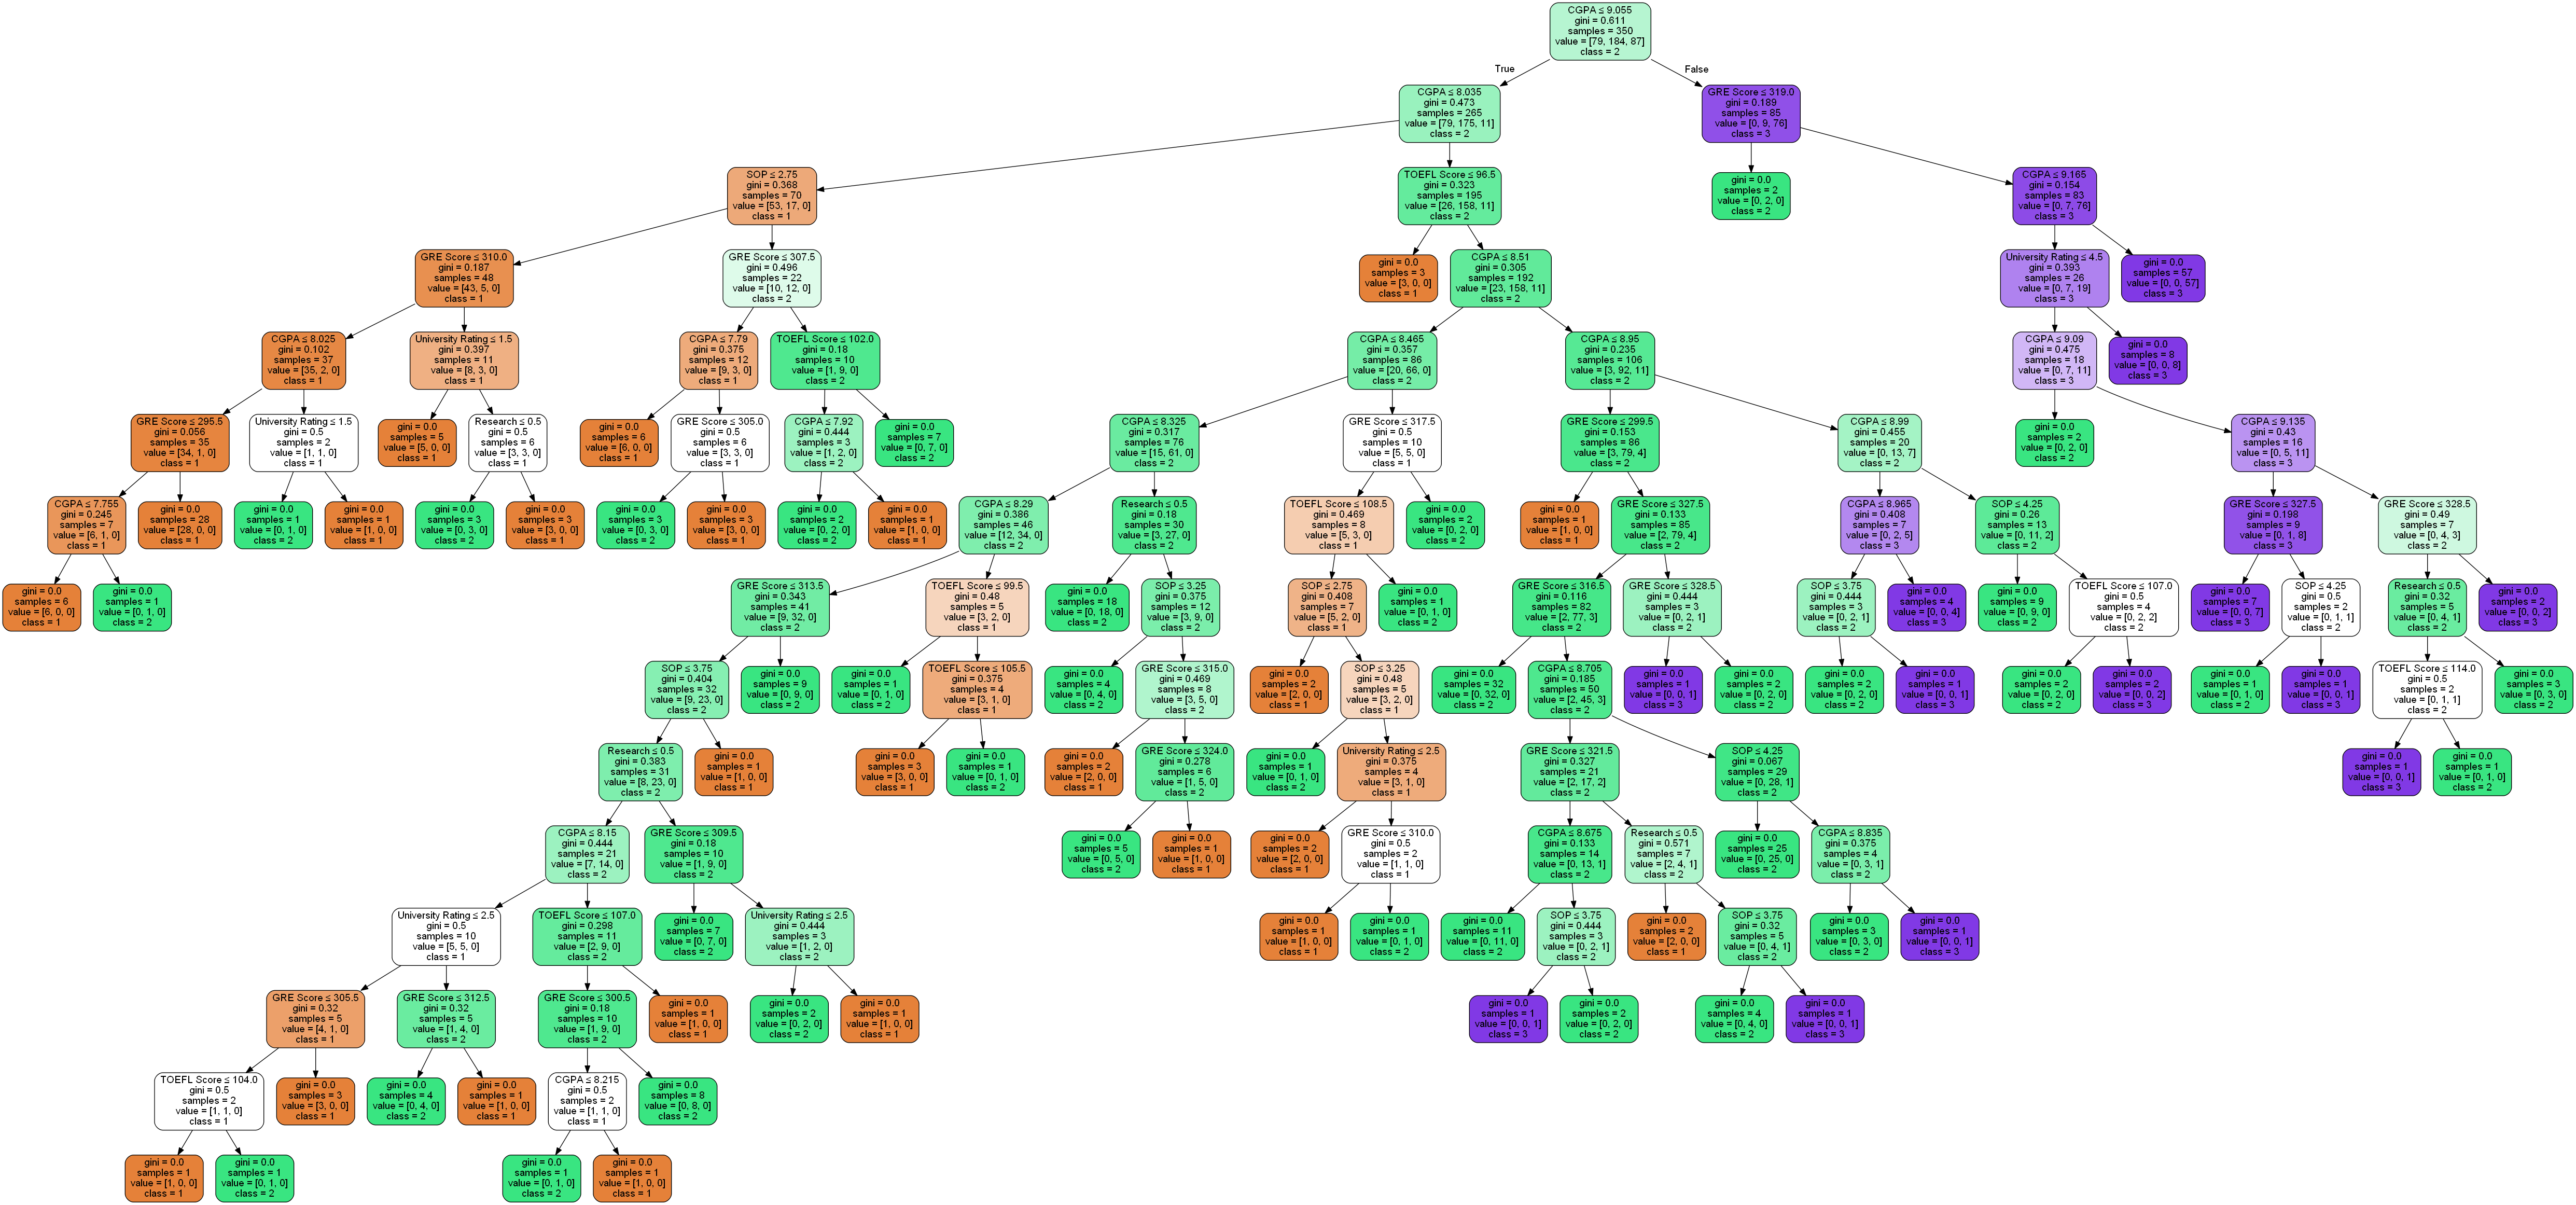

In [547]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('admis.png')
Image(graph.create_png())

In [548]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7733333333333333


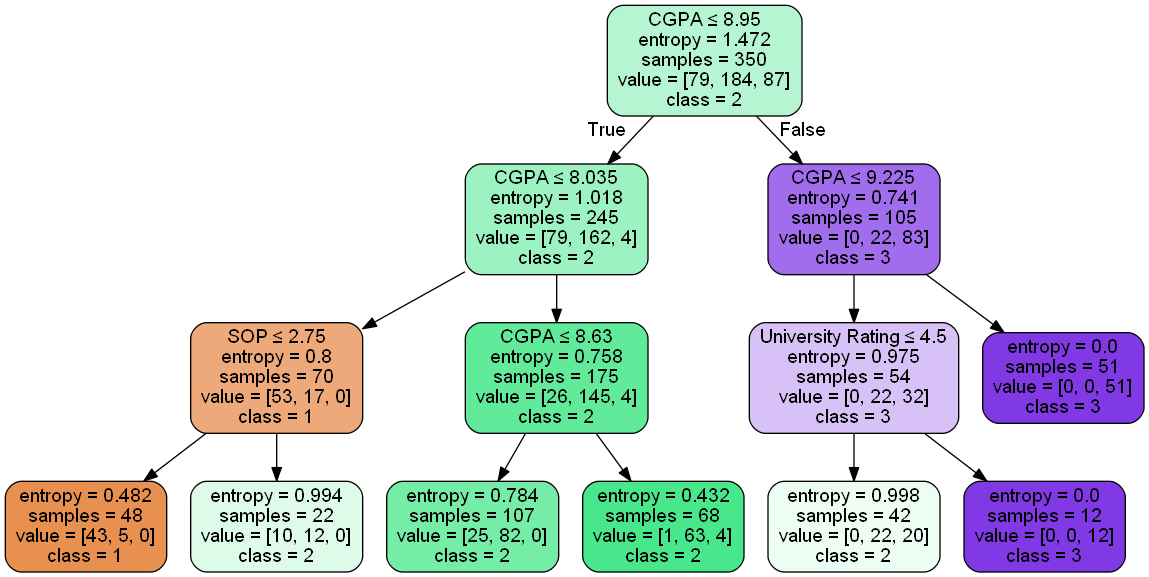

In [549]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('admis.png')
Image(graph.create_png())

## Rules
1. CGPA <=8.035 & SOP <=2.75 ===============> Class 1
2. CGPA<=8.63 ==============================> Class 2
3. CGPA<=9.225 & University Rating <=4.5 ===> Class 2
4. CGPA<=9.225 =============================> Class 3

The less entropy the more valuable the rule is, since the entropy shows disorder/impurity.
That means the most valuable rules are: Rule 4 and Rule 1

## End of Part B (II)

## Part C (I)

In [550]:
# ID3 tree from original dataset

In [551]:
import subprocess
from id3 import Id3Estimator, export_graphviz

feature_names = ["color",
                 "shape",
                 "size"]

X = np.array([["red", "square", "big"],
              ["blue", "square", "big"],
              ["red", "round", "small"],
              ["green", "square", "small"],
              ["red", "round", "big"],
              ["green", "round", "big"]])

y = np.array(["+",
              "+",
              "-",
              "-",
              "+",
              "-"])

clf = Id3Estimator()
clf.fit(X, y, check_input=True)

export_graphviz(clf.tree_, "out.dot", feature_names)

################

C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


<_io.TextIOWrapper name='out.dot' mode='w' encoding='utf8'>

In [552]:
subprocess.run(['dot', '-Tpng', 'out.dot', '-o', 'original_tree.png'])

CompletedProcess(args=['dot', '-Tpng', 'out.dot', '-o', 'original_tree.png'], returncode=0)

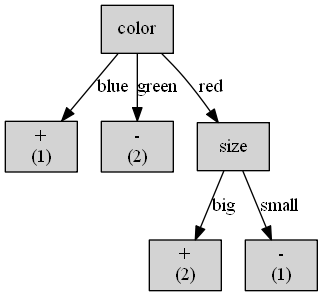

In [553]:
Image(filename='original_tree.png')

## Part C (II)

### Decision tree from new dataset created by adding an attribute.

In [554]:
feature_names = ["color",
                 "shape",
                 "size",
                "pattern"]

X = np.array([["red", "square", "big", "checked"],
              ["blue", "square", "big", "checked"],
              ["red", "round", "small", "random"],
              ["green", "square", "small", "random"],
              ["red", "round", "big", "checked"],
              ["green", "round", "big", "stripped"]])

y = np.array(["+",
              "+",
              "-",
              "-",
              "+",
              "-"])

clf2 = Id3Estimator()
clf2.fit(X, y, check_input=True)

export_graphviz(clf2.tree_, "modified_out.dot", feature_names)


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


<_io.TextIOWrapper name='modified_out.dot' mode='w' encoding='utf8'>

In [555]:
subprocess.run(['dot', '-Tpng', 'modified_out.dot', '-o', 'modified_tree.png'])

CompletedProcess(args=['dot', '-Tpng', 'modified_out.dot', '-o', 'modified_tree.png'], returncode=0)

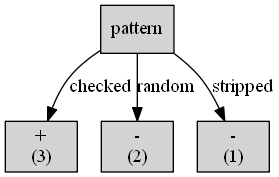

In [556]:
Image(filename='modified_tree.png')

## Answer for Part C (III)
Now since pattern alligned with classes i.e. every checked corresponds to Class "+"
The pattern became no 1 identifier.
It's important to evaluate which feature most precisily corresponds to which class,
For exapmle if Class "+" => Sale, then knowing that all "Checked" shirts corrspond to sale
the company has to start manufacturing "Checked" shirts, to capitalize on demand
If Data scientist misses an important attribute it might have advers effect on sales and profits
Million more shirts produced without knowing what corresponds to sales might get company bancrupt
If a Data scientist gets it right by discovering an important feature the company will benefit
greatly and the employee will be due for a bonus or a promotion

## Part A

In [557]:
mpg = pd.read_csv('mpg.csv')
mpgs = mpg
mpg.head(5)
corr_mpg = mpg.corr()
c1 = corr_mpg.abs().unstack()
c1.sort_values(ascending = False).sample(n=5)

displacement  model_year      0.370164
acceleration  acceleration    1.000000
cylinders     displacement    0.950721
model_year    displacement    0.370164
mpg           model_year      0.579267
dtype: float64

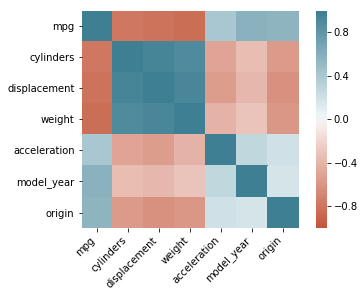

In [558]:
ax = sns.heatmap(
    corr_mpg, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

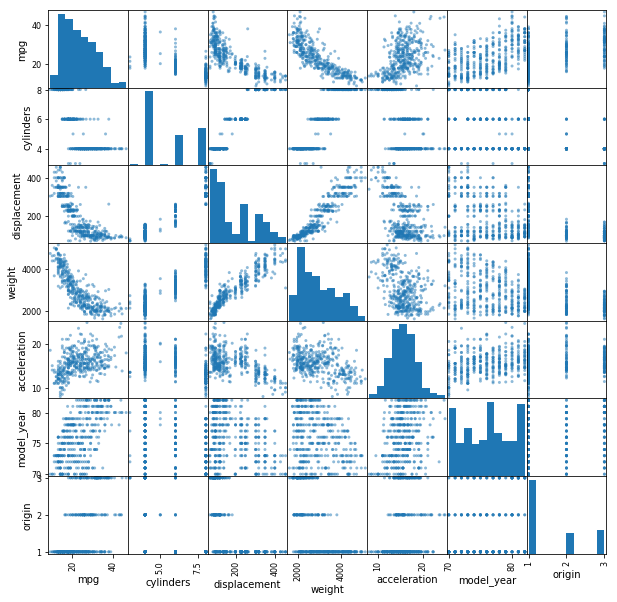

In [559]:
pd.plotting.scatter_matrix(mpg, figsize=(10, 10))
plt.show()

In [560]:
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [561]:
#Pre-processing
mpg.drop(mpg.columns[[1,7,3,5,6]], axis=1, inplace = True)

#Normalizing
normalize_numeric_minmax(mpg,"mpg")
normalize_numeric_minmax(mpg,"displacement")
normalize_numeric_minmax(mpg,"weight")

### Multilinear Regression

Root mean squared error = 0.0931
R-squared = 0.7825


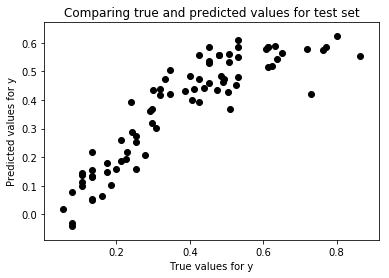

In [562]:
#Split
x1 = mpg.drop('mpg', axis=1)
y1 = mpg[['mpg']]
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2,
                                                  random_state=1)
#Fit
model_MPG = sklearn.linear_model.LinearRegression()
model_MPG.fit(x_train1, y_train1)

#predict
y_pred1 = model_MPG.predict(x_test1)

#Plot
plt.scatter(y_test1, y_pred1, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test1, y_pred1)))
print('R-squared = %.4f' % r2_score(y_test1, y_pred1))

### Multilinear MPG (reverse model)

Root mean squared error = 0.1188
R-squared = 0.6783


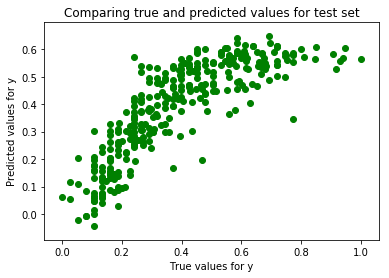

In [563]:
#Fit
reverse_model_MPG = sklearn.linear_model.LinearRegression()
reverse_model_MPG.fit(x_test1, y_test1)

#predict
y_pred_reverse = model_MPG.predict(x_train1)

#Plot
plt.scatter(y_train1, y_pred_reverse, color='green')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train1, y_pred_reverse)))
print('R-squared = %.4f' % r2_score(y_train1, y_pred_reverse))

### Simple linear regression

In [564]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(mpg[['weight']], mpg['mpg'], test_size=0.2, random_state=42)

Root mean squared error = 0.1026
R-squared = 0.7230


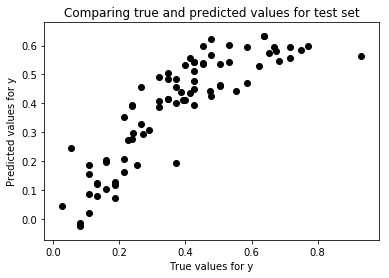

In [565]:
#Fit
model_MPG = sklearn.linear_model.LinearRegression()
model_MPG.fit(x_train2, y_train2)

#predict
y_pred2 = model_MPG.predict(x_test2)

#Plot
plt.scatter(y_test2, y_pred2, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test2, y_pred2)))
print('R-squared = %.4f' % r2_score(y_test2, y_pred2))

### Simple regression

Root mean squared error = 0.1183
R-squared = 0.6845


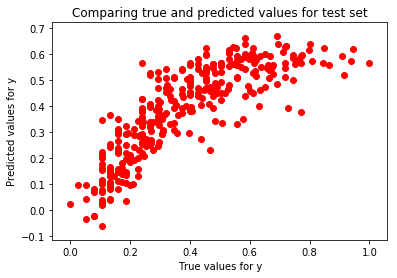

In [566]:
#Fit
reverse_model_MPG = sklearn.linear_model.LinearRegression()
reverse_model_MPG.fit(x_test2, y_test2)

#predict
y_pred_reverse = model_MPG.predict(x_train2)

#Plot
plt.scatter(y_train2, y_pred_reverse, color='red')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train2, y_pred_reverse)))
print('R-squared = %.4f' % r2_score(y_train2, y_pred_reverse))

## End of part A